Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


Load Data from CSV Files:



In [4]:
# Define the directory where the CSV files are located
csv_directory = 'D:/data/Solar Radiation Measurement Data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Load each CSV file into a DataFrame
dataframes = {}
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    dataframes[file] = pd.read_csv(file_path)
    print(f"Loaded {file} with shape {dataframes[file].shape}")

# Display the first few rows of one DataFrame
df = dataframes[csv_files[0]]
df.head()


Loaded benin-malanville.csv with shape (525600, 19)
Loaded sierraleone-bumbuna.csv with shape (525600, 19)
Loaded togo-dapaong_qc.csv with shape (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# Check for missing values
print(df.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
# Drop columns with any null values
df_cleaned = df.dropna(axis=1, how='any')

In [7]:
# Convert the Timestamp column to datetime format for time series analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert the Timestamp column to datetime format for time series analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the Timestamp as the index for easier time-based analysis
df.set_index('Timestamp', inplace=True)

# Basic data exploration
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

Data Distributions:



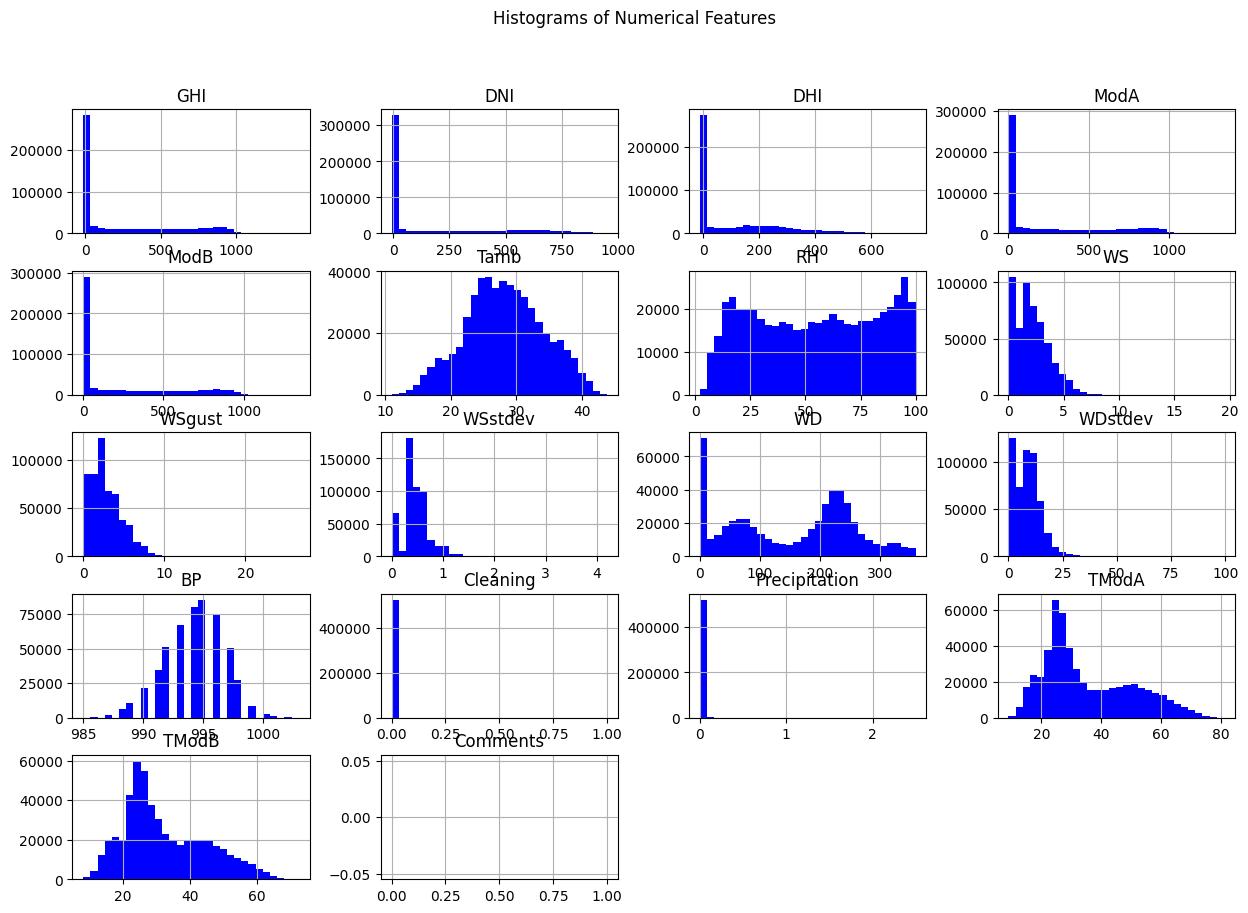

In [8]:
df.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

Load each country's dataset separately

In [10]:
# Load each country's dataset separately
benin_data = pd.read_csv('D:/data/Solar Radiation Measurement Data/benin-malanville.csv')
sierra_leone_data = pd.read_csv('D:/data/Solar Radiation Measurement Data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('D:/data/Solar Radiation Measurement Data/togo-dapaong_qc.csv')

# Add a 'Country' column to each DataFrame
benin_data['Country'] = 'Benin'
sierra_leone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

# Combine all datasets into a single DataFrame
df = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)

# Display the first few rows of each DataFrame to verify successful loading
print("Benin Data:")
print(benin_data.head())

print("\nSierra Leone Data:")
print(sierra_leone_data.head())

print("\nTogo Data:")
print(togo_data.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Country  
0       NaN   Benin  
1       NaN   Benin  
2       NaN   Benin  
3   

Solar Irradiance trends (GHI, DNI, DHI) over time for each country Correlation Analysis:

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8312\3259811779.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


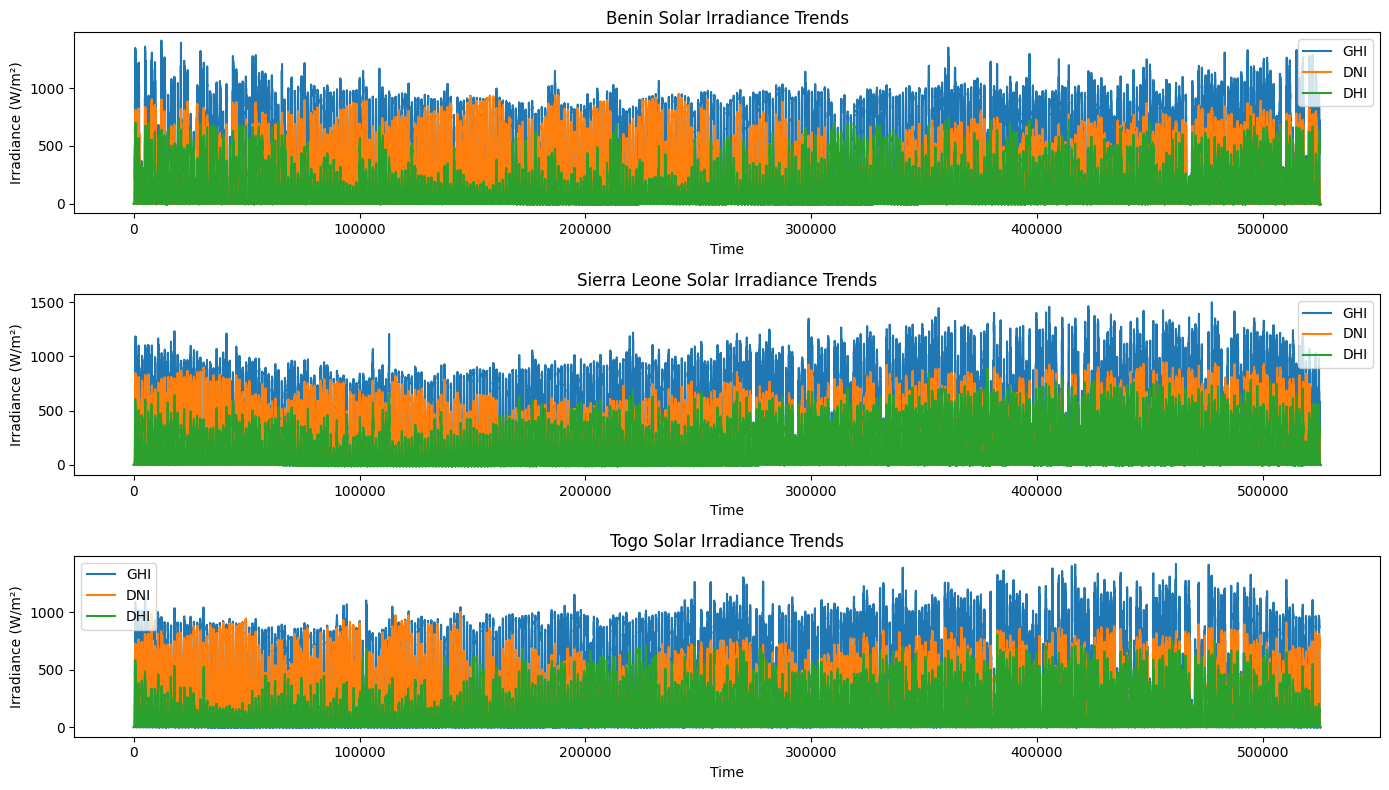

In [11]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(benin_data.index, benin_data['GHI'], label='GHI')
plt.plot(benin_data.index, benin_data['DNI'], label='DNI')
plt.plot(benin_data.index, benin_data['DHI'], label='DHI')
plt.title('Benin Solar Irradiance Trends')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sierra_leone_data.index, sierra_leone_data['GHI'], label='GHI')
plt.plot(sierra_leone_data.index, sierra_leone_data['DNI'], label='DNI')
plt.plot(sierra_leone_data.index, sierra_leone_data['DHI'], label='DHI')
plt.title('Sierra Leone Solar Irradiance Trends')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(togo_data.index, togo_data['GHI'], label='GHI')
plt.plot(togo_data.index, togo_data['DNI'], label='DNI')
plt.plot(togo_data.index, togo_data['DHI'], label='DHI')
plt.title('Togo Solar Irradiance Trends')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()



Analysis of Temperature and Humidity impact on solar efficiency

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


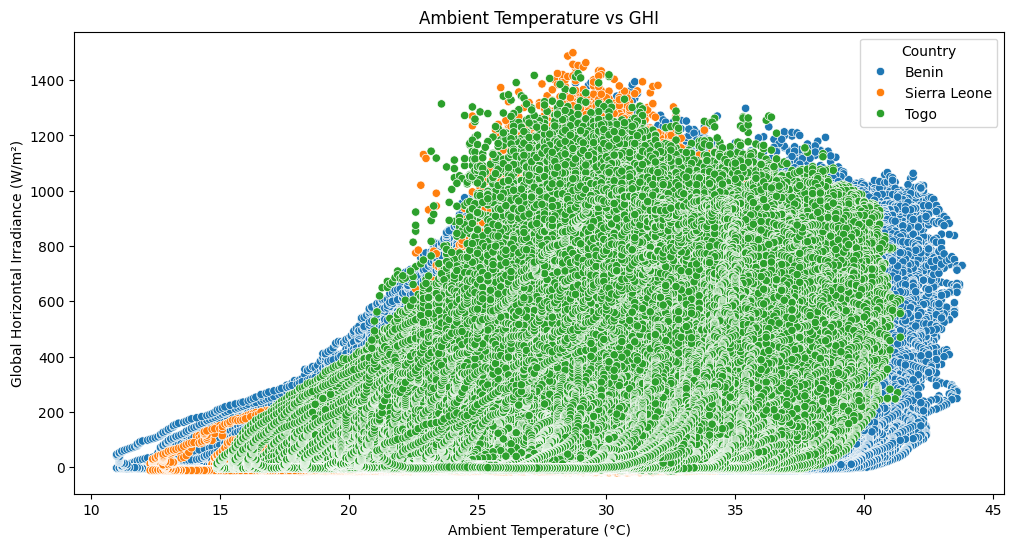

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


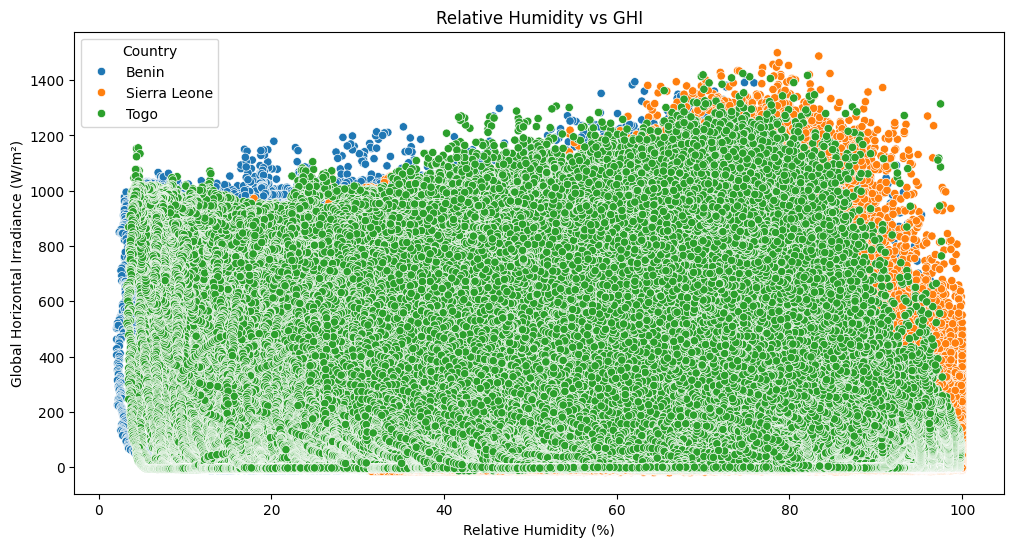

In [12]:
# Analysis of Temperature and Humidity impact on solar efficiency
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Tamb', y='GHI', hue='Country')
plt.title('Ambient Temperature vs GHI')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RH', y='GHI', hue='Country')
plt.title('Relative Humidity vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.show()

Wind Speed Analysis

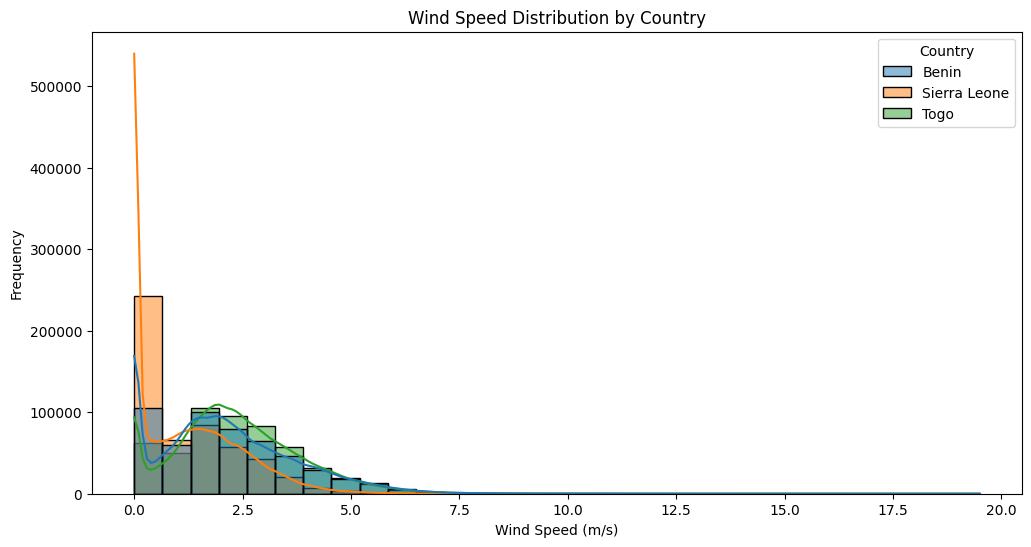

In [13]:
# Wind Speed Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='WS', hue='Country', kde=True, bins=30)
plt.title('Wind Speed Distribution by Country')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

Analysis of Soiling and Cleaning Impact

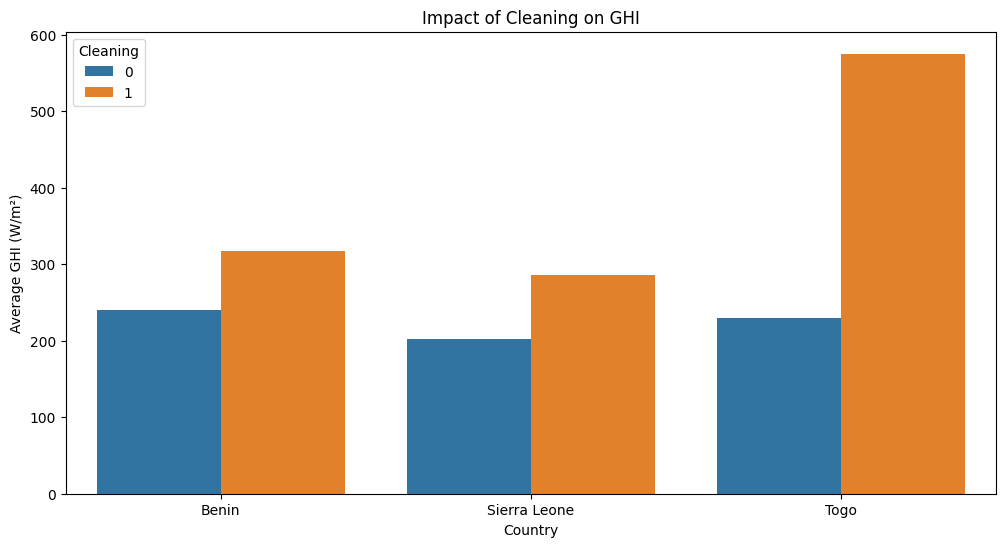

In [14]:
# Analysis of Soiling and Cleaning Impact
cleaning_effectiveness = df.groupby(['Country', 'Cleaning'])[['GHI', 'ModA', 'ModB']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='GHI', hue='Cleaning', data=cleaning_effectiveness)
plt.title('Impact of Cleaning on GHI')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()

Save the cleaned and processed data to a new CSV file for further analysis

In [15]:
# Save the cleaned and processed data to a new CSV file for further analysis
df.to_csv('processed_solar_data.csv', index=True)